In [1]:
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

X, y = make_moons(20000, noise = 0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svm = SVC(C=1.0, gamma = 1.0)
svm.fit(X_train, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, svm.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

The accuracy on the training subset: 0.940
The accuracy on the test subset: 0.947
Confusion matrix:
[[2341  154]
 [ 112 2393]]


In [2]:

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

print('The accuracy on the training subset: {:.3f}'.format(rf.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(rf.score(X_test, y_test)))
confusion = confusion_matrix(y_test, rf.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

The accuracy on the training subset: 1.000
The accuracy on the test subset: 0.938
Confusion matrix:
[[2313  182]
 [ 129 2376]]


In [3]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

print('The accuracy on the training subset: {:.3f}'.format(lr.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(lr.score(X_test, y_test)))
confusion = confusion_matrix(y_test, lr.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

The accuracy on the training subset: 0.859
The accuracy on the test subset: 0.866
Confusion matrix:
[[2136  359]
 [ 312 2193]]


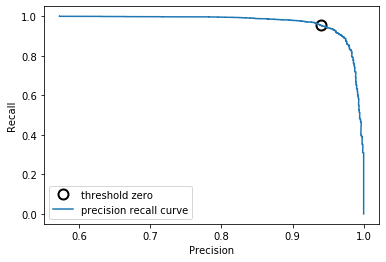

In [4]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svm.decision_function(X_test))
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

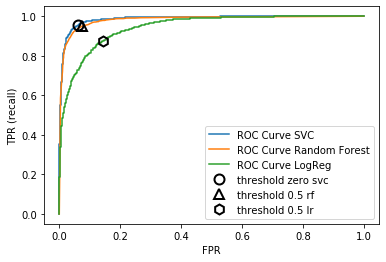

In [5]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, svm.decision_function(X_test))
r_fpr, r_tpr, r_thr = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
l_fpr, l_tpr, l_thr = roc_curve(y_test, lr.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(r_fpr,r_tpr, label ="ROC Curve Random Forest")
plt.plot(l_fpr,l_tpr, label ="ROC Curve LogReg")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
r_close_zero = np.argmin(np.abs(r_thr-0.5))
l_close_zero = np.argmin(np.abs(l_thr-0.5))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)
plt.plot(r_fpr[r_close_zero], r_tpr[r_close_zero], '^', markersize=10,
         label="threshold 0.5 rf", fillstyle="none", c='k', mew=2)
plt.plot(l_fpr[l_close_zero], l_tpr[l_close_zero], 'h', markersize=10,
         label="threshold 0.5 lr", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [6]:
print(roc_auc_score(y_test, svm.decision_function(X_test)))

0.9869114676458706
